## Analisis de los indicadores de bienestar en Mexico

Cargando datos.

In [1]:
import numpy as np
import pandas as pd

bienestar_df = pd.read_csv('indicadores_bienestar_2014.csv', index_col = 0, thousands  = ',')
bienestar_df = bienestar_df[1:]

Seleccionamos la informacion que nos interesa. En este caso la informacion que hace referencia a la salud y pobreza.

In [2]:
col = ['Acceso a servicios de salud',
       'Esperanza de vida al nacer',
       'Tasa de obesidad',
       'Tasa de mortalidad materna',
       'Tasa de mortalidad infantil',
       'Satisfacción con la vida',
       'Porcentaje de la población en situación de pobreza',
       'Porcentaje de la población en situación de pobreza extrema']

bienestar_df = bienestar_df[col]
bienestar_df.head()

,Acceso a servicios de salud,Esperanza de vida al nacer,Tasa de obesidad,Tasa de mortalidad materna,Tasa de mortalidad infantil,Satisfacción con la vida,Porcentaje de la población en situación de pobreza,Porcentaje de la población en situación de pobreza extrema
Entidad,,,,,,,,
Aguascalientes,87.9,75.9,31.0,25.7,8.7,7.7,28.2,2.3
Baja California,80.6,74.2,39.5,42.3,13.8,8.3,22.2,1.1
Baja California Sur,84.9,76.2,43.6,32.1,11.2,8.3,22.1,1.6
Campeche,89.3,75.4,43.3,65.4,15.5,7.8,43.8,6.7
Coahuila de Zaragoza,87.2,76.0,37.1,27.0,12.3,8.0,24.8,1.7


Como en el ejercicio anterior, vamos a ver un resumen de la informacion

In [3]:
bienestar_df.describe()

,Acceso a servicios de salud,Esperanza de vida al nacer,Tasa de obesidad,Tasa de mortalidad materna,Tasa de mortalidad infantil,Satisfacción con la vida,Porcentaje de la población en situación de pobreza,Porcentaje de la población en situación de pobreza extrema
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000
mean,85.387500,75.221875,34.065625,38.465625,12.168750,7.953125,41.36250,6.921875
std,2.951517,0.958404,5.247218,11.981858,1.675524,0.239602,15.23387,7.146519
min,77.200000,73.000000,25.400000,14.800000,8.700000,7.500000,14.20000,0.600000
25%,84.400000,74.900000,30.300000,30.700000,10.950000,7.800000,30.15000,2.575000
50%,85.750000,75.500000,33.300000,37.100000,12.350000,7.900000,39.70000,4.300000
75%,87.275000,75.900000,37.100000,44.925000,13.525000,8.125000,50.67500,7.925000
max,90.900000,76.700000,44.800000,65.400000,15.500000,8.400000,77.10000,28.100000


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(bienestar_df)

ind_pca = pca.transform(bienestar_df)
ind_pca_df = pd.DataFrame(ind_pca)
ind_pca_df.index = bienestar_df.index
ind_pca_df.columns = ['CP1','CP2']
ind_pca_df.head()

,CP1,CP2
Entidad,,
Aguascalientes,-17.915359,-6.163269
Baja California,-16.399803,12.875493
Baja California Sur,-21.433369,4.482988
Campeche,12.786115,24.722101
Coahuila de Zaragoza,-20.748155,-2.312095


In [5]:
print(pca.explained_variance_ratio_)

[0.68220668 0.22634126]


Ahora imprimimos los datos para tener una mejor visualizacion de estos.

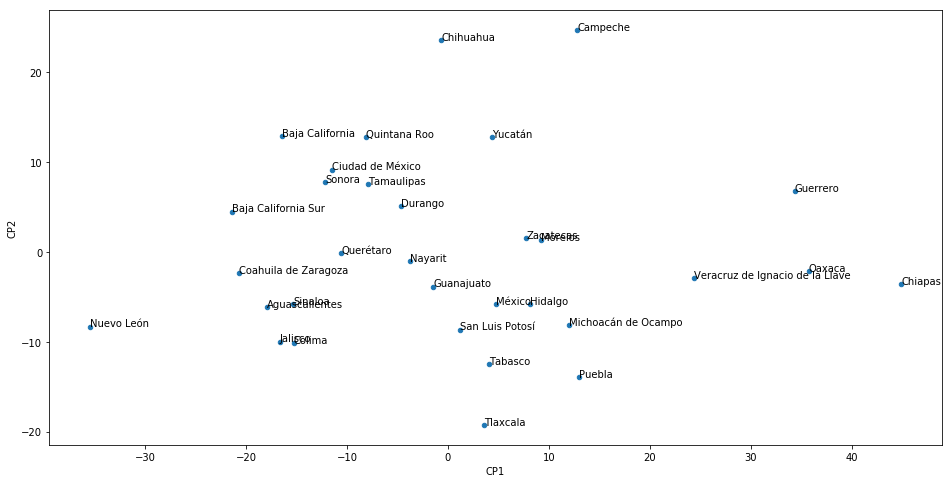

In [6]:
%matplotlib inline

ax = ind_pca_df.plot(kind='scatter', x='CP1', y='CP2', figsize=(16,8))

for i, estado in enumerate(ind_pca_df.index):
    ax.annotate(estado, (ind_pca_df.iloc[i].CP1, ind_pca_df.iloc[i].CP2))

## Buscando similitudes entre estados usando las K-medias

Text(0.5,1,'Selección de K con el método del codo')

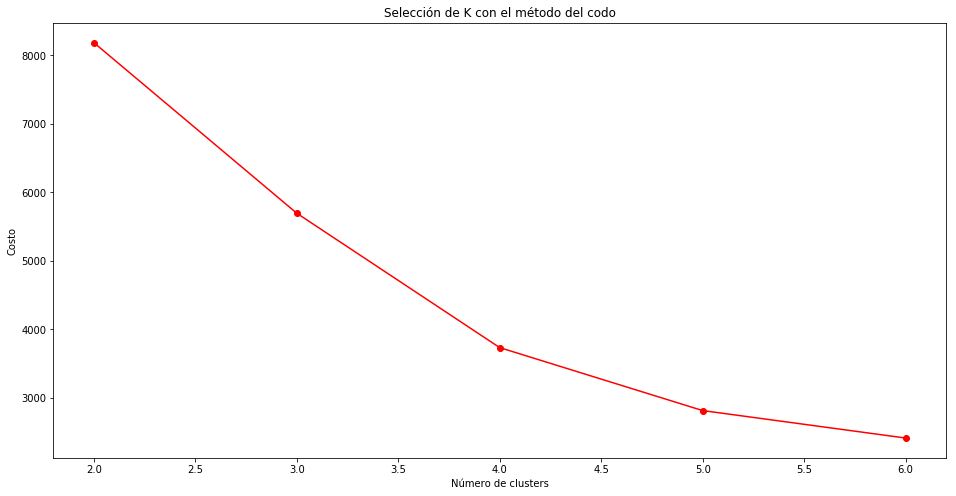

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

maxK = 6
listaK = range(2,maxK + 1)
costos=[]

for k in listaK:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(bienestar_df)
    costos.append(-kmeans.score(bienestar_df))
    
plt.figure(figsize=(16,8))
plt.plot(listaK, costos, '-or')
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('Selección de K con el método del codo')

Se puede observar como es que el tercer codo es el mas pronunciado.

___

Ahora agregamos los clusters obtenidos a los datos que ya habíamos reducido con PCA (par poder visualizarlos) y los graficamos de la misma manera.

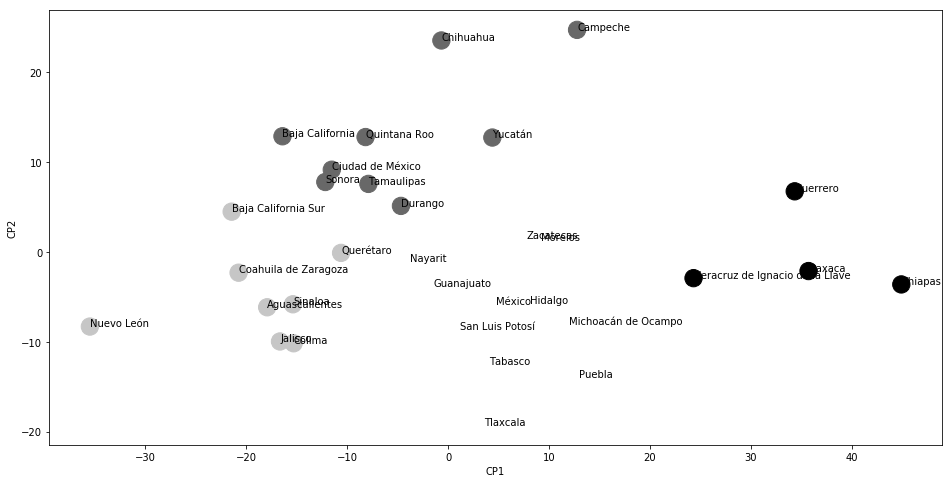

In [8]:
K = 4
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit(bienestar_df)
ind_pca_df['grupos'] = pd.Series(clusters.labels_, index=ind_pca_df.index)


ax = ind_pca_df.plot(kind='scatter', x='CP1', y='CP2', 
                     c=ind_pca_df.grupos.astype(float),
                     figsize=(16,8), s=300)

for i, estado in enumerate(ind_pca_df.index):
    ax.annotate(estado, (ind_pca_df.iloc[i].CP1, ind_pca_df.iloc[i].CP2))


Con esto podemos hacer un analisis de de los prototipos para tener una idea clara de los clusters.

In [9]:
prototipos_df = pd.DataFrame(kmeans.cluster_centers_)
prototipos_df.index = ['P'+str(i + 1) for i in range(K)]
prototipos_df.columns = bienestar_df.columns
prototipos_df.index.names = ['Prototipo']
prototipos_df.columns.names = ['Indicador']

prototipos_df

Indicador,Acceso a servicios de salud,Esperanza de vida al nacer,Tasa de obesidad,Tasa de mortalidad materna,Tasa de mortalidad infantil,Satisfacción con la vida,Porcentaje de la población en situación de pobreza,Porcentaje de la población en situación de pobreza extrema
Prototipo,,,,,,,,
P1,85.454545,75.227273,31.363636,34.927273,12.581818,7.854545,49.263636,7.218182
P2,86.475000,75.987500,35.125000,25.775000,10.425000,8.000000,27.075000,2.050000
P3,84.911111,75.355556,37.666667,47.722222,12.777778,8.144444,32.333333,3.477778
P4,84.100000,73.375000,31.275000,52.750000,13.150000,7.700000,68.525000,23.600000


***
Podemos ver las diferencias de los indicadores para los cuatro prototipos.

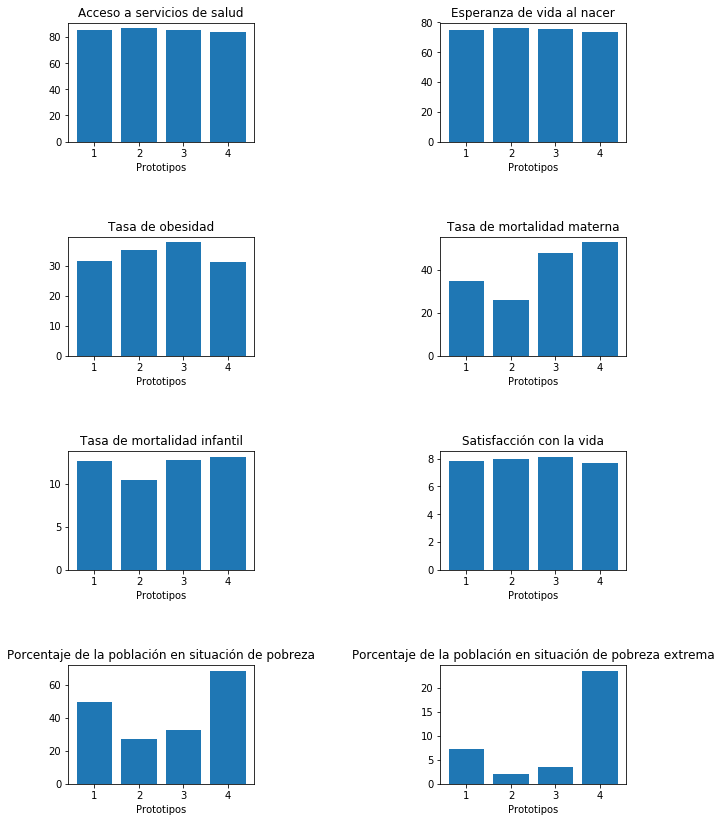

In [10]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (10, 14))

ind = [(i, j) for i in range(4) for j in range(2)]

for indicador, (i, j) in zip(col, ind):
    axes[i, j].bar([1, 2, 3, 4], prototipos_df[indicador])
    axes[i, j].set(title = indicador)
    axes[i, j].set(xlabel = 'Prototipos')

fig.subplots_adjust(wspace = 1.0, hspace = 0.8)

#### Conclusiones

Podemos observar como es que las tazas de mortalidad son afectadas por el porcentaje de la poblacion en situacion de pobreza y pobreza extrema. Tambien cabe notar que en de entre los cuatro prototipos, el tercero es el tiene el porcentaje mas alto de poblacion en situacion de pobreza y como es de esperarse, por lo tanto contiene la mayor parte de la poblacion en situacion de pobreza extrema.
Podemos notar que la tasa de mortalidad infantil para el prototipo 4 es mas baja que los demas, algun factor puede ser que este prototipo es el que menos se ve afectado por el porcentaje de poblacion en situacion de pobreza (extrema).
Parece ser que el prototipo 1 y 4 son los que mas son afectados por la obesidad.

A pesar de todo esto parece ser que entre el acceso a servicios de salud, la esperanza de vida al nacer y la satisfaccion de vida no hay algun cambio drastico.